In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.decomposition

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import pandas.plotting



In [2]:
train = pd.read_csv("..\\data\\train.csv")



<AxesSubplot:title={'center':'Train data under SVD decomposition[1]'}, xlabel='0', ylabel='1'>

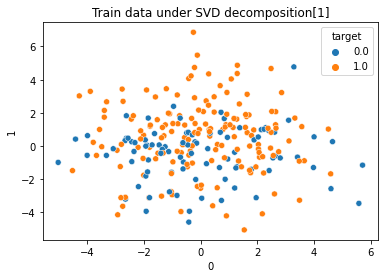

In [3]:
trainDF = pd.DataFrame(train)
svd = sklearn.decomposition.TruncatedSVD(n_components=2, random_state=14)
svd_result = pd.DataFrame(svd.fit_transform(trainDF.iloc[:, 2:302]))


plt.title("Train data under SVD decomposition[1]")

sns.scatterplot(x=svd_result[0], y=svd_result[1], hue=trainDF["target"])


<AxesSubplot:title={'center':'Count (target)'}>

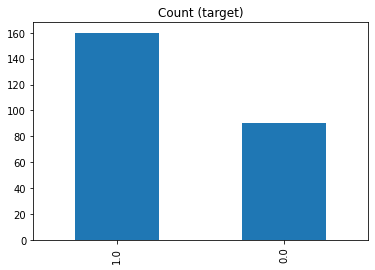

In [4]:
train['target'].value_counts().plot(kind='bar', title='Count (target)')


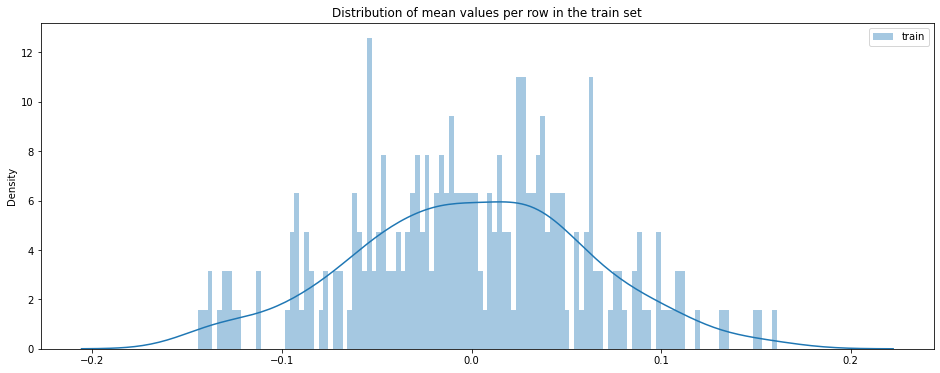

In [5]:

plt.figure(figsize=(16, 6))
features = train.columns.values[2:302]
plt.title("Distribution of mean values per row in the train set")
sns.distplot(train[features].mean(axis=1),
             kde=True, bins=120, label='train')
plt.legend()
plt.show()


<Figure size 432x288 with 0 Axes>

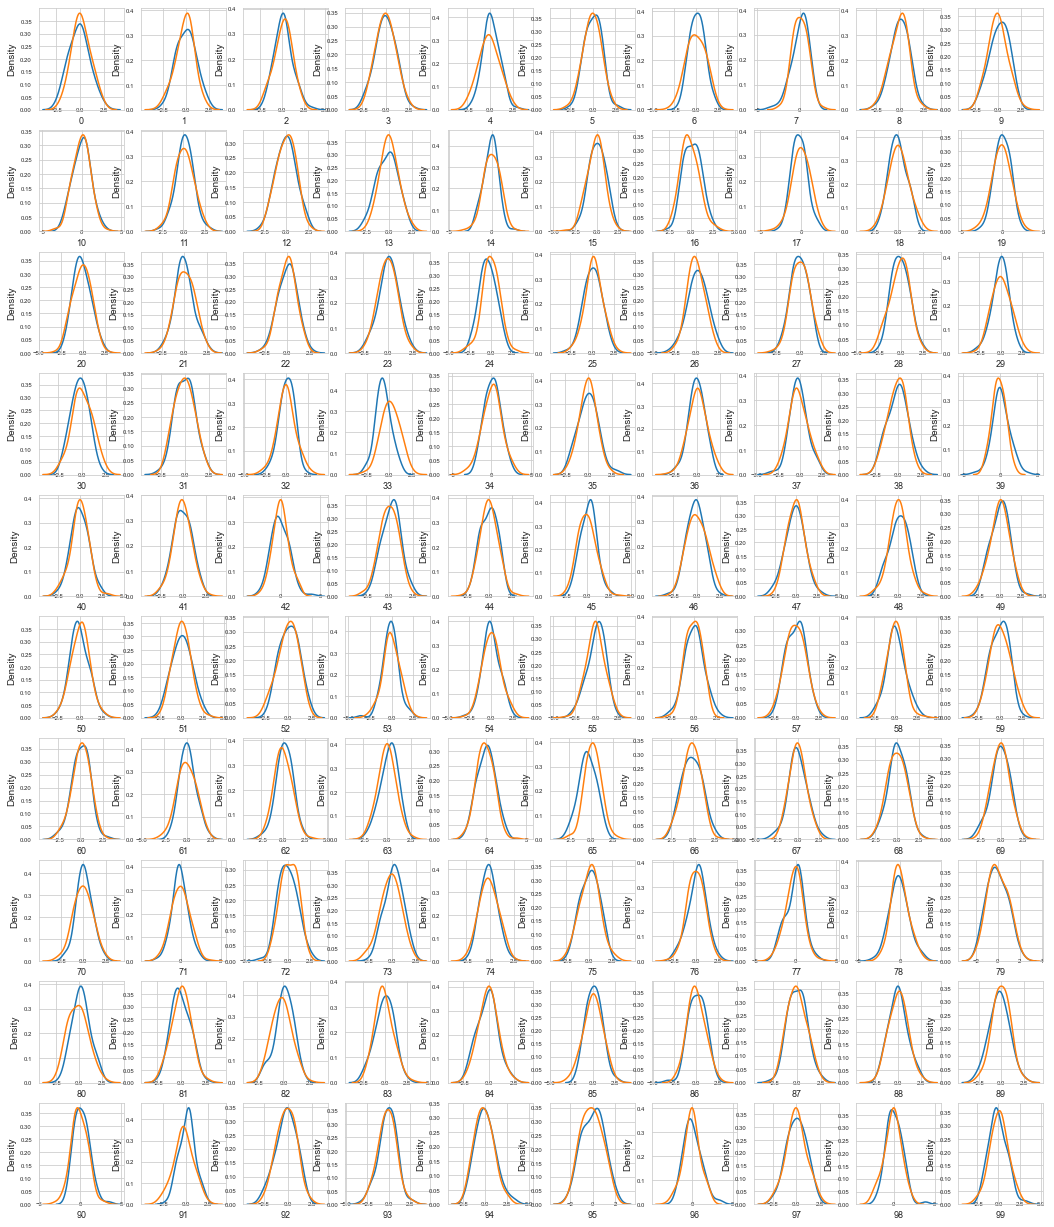

In [6]:
# derived from https://www.kaggle.com/gpreda/overfitting-the-private-leaderboard


def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10, 10, figsize=(18, 22))

    for feature in features:
        i += 1
        plt.subplot(10, 10, i)
        sns.kdeplot(df1[feature], bw=0.5, label=label1)
        sns.kdeplot(df2[feature], bw=0.5, label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show()


t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]
features = train.columns.values[2:102]
plot_feature_distribution(t0, t1, '0', '1', features)




<AxesSubplot:title={'center':'Correlations between attributes'}, ylabel='Density'>

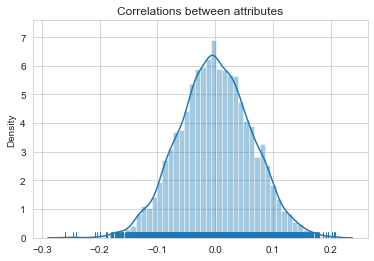

In [7]:
correlations = train[features].corr()
for i in range(correlations.shape[0]):
    # not correlated with itself
    correlations['{}'.format(i)]['{}'.format(i)] = 0
plt.title("Correlations between attributes")
sns.distplot(correlations, hist=True, rug=True)
